Exploratory Analysis Idenitity Changes in Denmark

Cosas a investigar
En la investigación cuantitativa se enfocará en explorar el efecto de las siguientes tres variables independientes: la región del mundo, el tiempo vivido en Dinamarca y el idioma nativo. Se buscará la existencia de una diferencia significativa en estás tres variables independientes.

Hipótesis: Existe una diferencia significativa entre la región del mundo de la que una persona migra a Dinamarca y: la discriminación a la que es sujeta, la soledad que experimenta, su bienestar mental y si quiere o no quedarse en el país?
Si el país de origen afecta.
La discriminación
Que tan solo se siente
El mental well-being
Si quieren vivir en el país

Si el tiempo que la persona lleva viviendo en Dinamarca afecta.
El impacto que ha tenido en la personalidad de alguien
Sense of belonging

Ver como el idioma nativo de una persona
cambia la personalidad de alguien al cambiar idioma
que tan commited está a aprender Danés 

Grafica para mostrar con quién socializan más
Grafica que muestra que tanto commitment hay por aprender Danes

¿Comparar con quién se identifican con una variable?




Hypothesis 1: There is a significant difference between the region of the world and the discrimination, solitud, mental well being, personality and plans to stay longer. 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
df = pd.read_csv("C:/Users/santi/Downloads/Identity (respuestas) - Hipotésis 1.csv")
df.dropna(subset=['Region'], inplace=True)
# Grouping South West Europe, Central and Eastern, North West, Sout America, Asia, Africa
unique_count = df['Region'].nunique()


#There are 8 different Regions
regions= df['Region'].unique()
value_counts = df['Region'].value_counts()

# Remplazar pregunta 3 y 4 por valores numericos eliminar la pregunta 6. 
df

,Region,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6
0,Rest of the World,2,3,Not at all,Unchanged,3,Yes
1,America,3,4,Has been impacted positively,More lonely,3,Yes
2,Rest of the World,3,3,Has been impacted positively,Less lonely,4,Yes
3,Rest of the World,1,1,Has been impacted positively,More lonely,3,I don´t know
4,Eastern Europe,1,1,Not at all,Unchanged,1,Yes
...,...,...,...,...,...,...,...
71,Central Europe,4,3,Has been impacted positively,Unchanged,4,Yes
74,Central Europe,2,1,Has been impacted positively,More lonely,4,No
75,Central Europe,2,2,Has been impacted positively,Unchanged,5,Yes
76,Rest of the World,1,1,Has been impacted positively,Less lonely,3,Yes


In [2]:
# Transform the string values to numeric values in order to perform the Kruskall-Wallis test
question_3 = {'Has been impacted negatively': 1, 'Not at all': 2, 'Has been impacted positively': 3}
df['Question 3'] = df['Question 3'].replace(question_3)
question_4 = {'More lonely': 1, 'Unchanged': 2, 'Less lonely': 3}
df['Question 4'] = df['Question 4'].replace(question_4)
question_6 = {'No': 1, 'I don´t know': 2, 'Yes': 3}
df['Question 6'] = df['Question 6'].replace(question_6)
df

,Region,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6
0,Rest of the World,2,3,2,2,3,3
1,America,3,4,3,1,3,3
2,Rest of the World,3,3,3,3,4,3
3,Rest of the World,1,1,3,1,3,2
4,Eastern Europe,1,1,2,2,1,3
...,...,...,...,...,...,...,...
71,Central Europe,4,3,3,2,4,3
74,Central Europe,2,1,3,1,4,1
75,Central Europe,2,2,3,2,5,3
76,Rest of the World,1,1,3,3,3,3


In [3]:
# Perform the Kruskal-Wallis statistical test for each question
for i in range(1, 7):
    question = 'Question ' + str(i)
    groups = []
    
    for region in df['Region'].unique():
        groups.append(df[df['Region'] == region][question].dropna())
    stat, p = kruskal(*groups)
    
    # Print the results
    print(f"Kruskal-Wallis for {question}: Statistical={stat}, p-value={p}")


Kruskal-Wallis for Question 1: Statistical=6.32762167125804, p-value=0.2756322591262181
Kruskal-Wallis for Question 2: Statistical=4.303822663456984, p-value=0.5065520501146454
Kruskal-Wallis for Question 3: Statistical=10.140404142869142, p-value=0.07135331258698109
Kruskal-Wallis for Question 4: Statistical=2.3890697009322164, p-value=0.7931007380640501
Kruskal-Wallis for Question 5: Statistical=12.556101479614007, p-value=0.027913378771691928
Kruskal-Wallis for Question 6: Statistical=5.01073776330969, p-value=0.4145711416588242


Only in question 5: Has moving to Denmark impacted my personality? There is a statistically significant answer acroos the groups. In the question 3: Has moving to Denmark impacted my mental well-being there is almost a significant difference. A post hoc analysis will be performed in order to determine accross group there is a significant difference in the response.  

In [6]:
# Post Hoc comparison for question 3
count()
median_q3 = df.groupby('Region')['Question 3'].median()
median_q3

Region
America                3.0
Central Europe         3.0
Eastern Europe         1.0
Northwestern Europe    3.0
Rest of the World      3.0
Southwestern Europe    3.0
Name: Question 3, dtype: float64

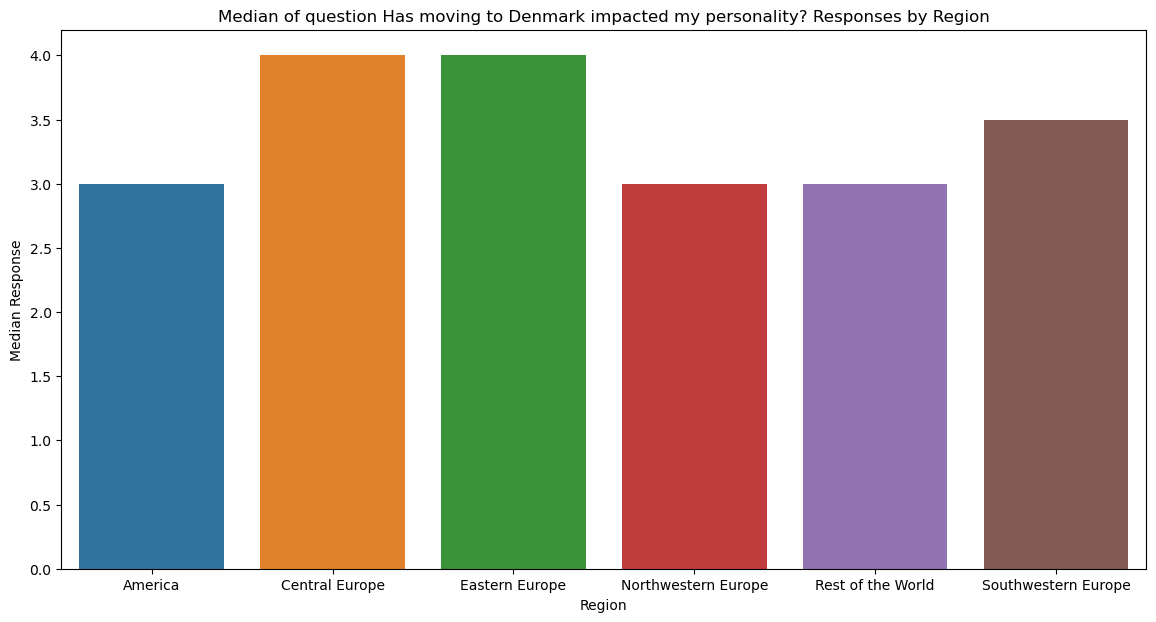

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Median comparison question 5
medians = df.groupby('Region')['Question 5'].median()
# Creating a DataFrame for visualization
visualization_data = pd.DataFrame({'Median': medians}).reset_index()

# Plotting the Median
plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='Median', data=visualization_data)
plt.title('Median of question Has moving to Denmark impacted my personality? Responses by Region')
plt.xlabel('Region')
plt.ylabel('Median Response')
plt.show()

As our project focuses on studying Central and Eastern Europe. It is valuable to determine if there is a significant difference in the way people from that part of the world, responded to the questions significantly different. The significant value will be p=< 0.05.  

In [6]:
# Divide the responses in Central and Eastern Europe and Rest of the world
for index, row in df.iterrows():
    if row['Region'] == 'Central Europe' or row['Region'] == 'Eastern Europe':
        df.at[index, 'Region'] = 'Central and Eastern Europe'
    else:
        df.at[index, 'Region'] = 'Rest of the World'


The test that will be used to compare this two groups is the Mann-Whitney U because we are only comparing two groups. Our independent variable is nominal and our dependent variable is ordinal. 

In [7]:
from scipy.stats import mannwhitneyu
for i in range(1, 7):
    question = 'Question ' + str(i)

    # Assuming that there are only two unique regions in df['Region']
    unique_regions = df['Region'].unique()
    if len(unique_regions) == 2:
        group1 = df[df['Region'] == unique_regions[0]][question].dropna()
        group2 = df[df['Region'] == unique_regions[1]][question].dropna()

        # Perform the Mann-Whitney U test
        stat, p = mannwhitneyu(group1, group2)
        
        # Print the results
        print(f"Mann-Whitney U test for {question}: Statistical={stat}, p-value={p}")
    else:
        print(f"Unable to perform Mann-Whitney U test for {question} due to more than two unique regions.")

Mann-Whitney U test for Question 1: Statistical=456.5, p-value=0.3351527271385044
Mann-Whitney U test for Question 2: Statistical=598.0, p-value=0.35664264128825407
Mann-Whitney U test for Question 3: Statistical=641.0, p-value=0.11488437727200755
Mann-Whitney U test for Question 4: Statistical=623.0, p-value=0.20068001843841576
Mann-Whitney U test for Question 5: Statistical=364.5, p-value=0.02665368223668782
Mann-Whitney U test for Question 6: Statistical=570.5, p-value=0.5677300447182225


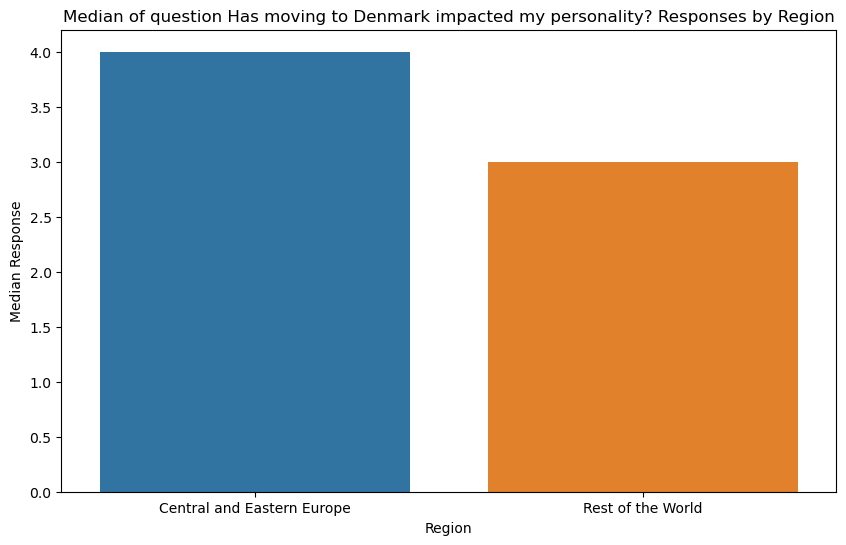

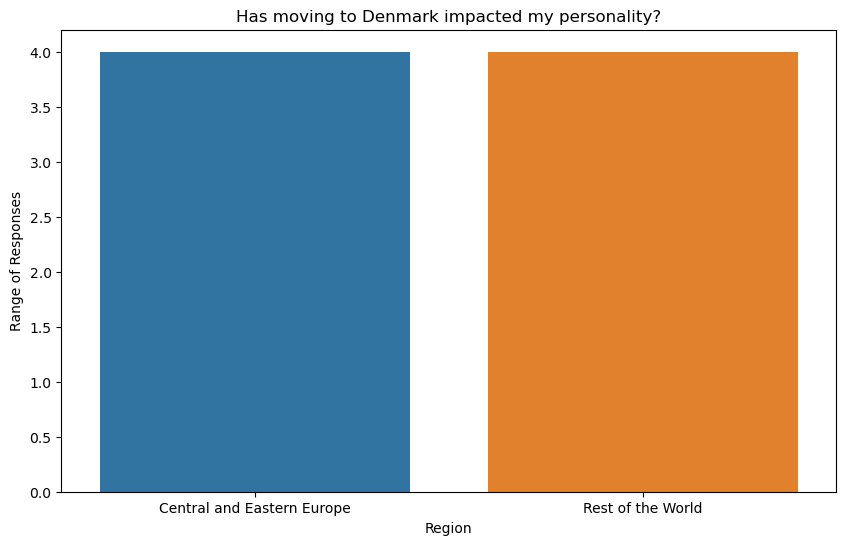

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it contains 'Region' and 'Question 5' columns
# You should replace the 'df' with your actual DataFrame

# Calculating the median and range for each group in Question 5
medians = df.groupby('Region')['Question 5'].median()
ranges = df.groupby('Region')['Question 5'].apply(lambda x: x.max() - x.min())

# Creating a DataFrame for visualization
visualization_data = pd.DataFrame({'Median': medians, 'Range': ranges}).reset_index()

# Plotting the Median
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Median', data=visualization_data)
plt.title('Median of question Has moving to Denmark impacted my personality? Responses by Region')
plt.xlabel('Region')
plt.ylabel('Median Response')
plt.show()

# Plotting the Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Range', data=visualization_data)
plt.title('Has moving to Denmark impacted my personality?')
plt.xlabel('Region')
plt.ylabel('Range of Responses')
plt.show()

